# Phase 3Visuals

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
pa = gp.read_file('Spatial Data/tlgdb_a_42_pa_County_2020.shp')
pa[['County', 'NAMELSAD']] = pa['NAMELSAD'].astype(str).str.split(' ', expand = True)
pa.drop(['NAMELSAD'], axis = 1, inplace = True)
pa['County'] = pa['County'].str.upper()
pa.head()

,COUNTYNS,GEOID,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,County
0,01214112,42007,H1,A,1.125855e+09,24162295.0,+40.6841401,-80.3507209,"POLYGON ((-80.51896 40.73374, -80.51896 40.734...",BEAVER
1,01213669,42053,H1,A,1.106596e+09,8369675.0,+41.5133040,-79.2497050,"POLYGON ((-79.20499 41.62641, -79.20129 41.626...",FOREST
2,01209189,42117,H1,A,2.936541e+09,8279675.0,+41.7668593,-77.2572881,"POLYGON ((-77.43967 42.00012, -77.43758 42.000...",TIOGA
3,01213667,42043,H1,A,1.359407e+09,86209037.0,+40.4125646,-76.7926343,"POLYGON ((-76.98439 40.51457, -76.98441 40.514...",DAUPHIN
4,01213692,42127,H1,A,1.879734e+09,64785676.0,+41.6466021,-75.2924932,"POLYGON ((-75.45976 41.59504, -75.45980 41.595...",WAYNE


In [3]:
#importing and formatting the cleaned data
data = pd.read_csv('all_data.csv', index_col = 0)
v = data.columns
w = v.str.lstrip()
w = w.str.replace('_', '')
rename = {v:w for (v,w) in zip(v,w)}
data.rename(rename, axis = 1, inplace = True)
data['BROADBAND USAGE'] = data['BROADBAND USAGE']*100
data.head()

,County,number18,%adv18,%prof18,%bas18,%belbas18,number22,%adv22,%prof22,%bas22,%belbas22,10 to 14 year olds enrolled in school,15 to 17 year olds enrolled in school,5 to 9 year olds enrolled in school,BROADBAND USAGE,Median Income
0,ADAMS,83.0,17.60,38.3,28.6,9.60,112.0,15.90,36.55,30.05,17.05,5305.0,4161.0,5034.0,24.50,67253
1,ALLEGHENY,61.0,17.15,32.9,24.5,9.85,58.0,13.25,29.30,25.40,15.80,59856.0,38359.0,61209.0,47.90,61043
2,ARMSTRONG,85.5,19.15,40.9,27.4,7.95,72.5,15.65,37.90,29.00,12.10,3073.0,2258.0,3812.0,24.00,51410
3,BEAVER,79.0,14.80,37.7,27.0,12.20,77.0,11.40,33.30,29.50,18.00,9066.0,5852.0,7693.0,30.75,57807
4,BEDFORD,68.0,14.30,38.1,31.4,9.20,69.0,14.10,32.90,29.20,15.20,NaN,NaN,NaN,12.25,50509


In [4]:
#Viewing the distribution of Income and Broadband usage for grouping
print(data['Median Income'].describe(), 
     '--- \n',
     data['BROADBAND USAGE'].describe())

count        67.000000
mean      57056.089552
std       11008.423125
min       39717.000000
25%       50211.500000
50%       53476.000000
75%       62211.000000
max      100214.000000
Name: Median Income, dtype: float64 --- 
 count    67.000000
mean     26.318657
std      17.362697
min       2.800000
25%      13.950000
50%      21.000000
75%      32.075000
max      77.000000
Name: BROADBAND USAGE, dtype: float64


In [5]:
#grouping income and broadband usage
data['Median Income Group']= pd.cut(data['Median Income'], 
                                        bins=[39000,50000,65000,80000,120000], 
                                        labels=['Very Low','Low','Moderate','High'])
data['Broadband Speed Category'] = pd.cut(data['BROADBAND USAGE'], 
                                        bins=[0,20,40,60,80], 
                                        labels=['Very Low','Low', 'Moderate', 'High'])
data['Population'] = data['10 to 14 year olds enrolled in school'] + data['15 to 17 year olds enrolled in school'] + data['5 to 9 year olds enrolled in school']

In [6]:
#calculating difference from 2018 to 2022 across the four testing categories
data['Below Basic Change'] = data['%belbas22'] - data['%belbas18']
data['Basic Change'] = data['%bas22'] - data['%bas18']
data['Proficient Change'] = data['%prof22'] - data['%prof18']
data['Advanced Change'] = data['%adv22'] - data['%adv18']

In [7]:
data['Below Basic Change'].describe()

count    67.000000
mean      6.161194
std       2.565089
min       0.700000
25%       4.200000
50%       6.050000
75%       7.925000
max      13.650000
Name: Below Basic Change, dtype: float64

In [8]:
#Calculating the average difference across testing levels by broadband category
dataSpeed = data.drop(['County', 'Median Income Group'], axis = 1)
dataSpeed = dataSpeed.groupby(by = 'Broadband Speed Category', observed = True).mean()
dataSpeed = dataSpeed.reset_index(names = 'Broadband Speed Category')
dataSpeed[['Below Basic Change Broadband Category', 'Basic Change Broadband Category', 'Proficient Change Broadband Category', 'Advanced Change Broadband Category']] = dataSpeed[['Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change']]
dataSpeed[['Broadband Speed Category', 'Below Basic Change Broadband Category', 'Basic Change Broadband Category', 'Proficient Change Broadband Category', 'Advanced Change Broadband Category']]
dataSpeed.head(4)

,Broadband Speed Category,number18,%adv18,%prof18,%bas18,%belbas18,number22,%adv22,%prof22,%bas22,...,Median Income,Population,Below Basic Change,Basic Change,Proficient Change,Advanced Change,Below Basic Change Broadband Category,Basic Change Broadband Category,Proficient Change Broadband Category,Advanced Change Broadband Category
0,Very Low,67.274194,16.445161,36.761290,27.975806,10.541935,67.693548,13.2500,33.972581,30.312903,...,52103.677419,15405.375000,6.043548,2.337097,-2.788710,-3.195161,6.043548,2.337097,-2.788710,-3.195161
1,Low,79.958333,17.150000,36.960417,27.231250,10.435417,76.645833,14.0250,33.400000,29.372917,...,56399.958333,29678.150000,6.260417,2.141667,-3.560417,-3.125000,6.260417,2.141667,-3.560417,-3.125000
2,Moderate,89.625000,15.331250,34.337500,27.000000,12.925000,86.687500,12.1250,30.281250,28.956250,...,62321.125000,87232.857143,6.981250,1.956250,-4.056250,-3.206250,6.981250,1.956250,-4.056250,-3.206250
3,High,86.750000,24.650000,36.112500,22.150000,7.237500,82.250000,19.8375,33.625000,25.412500,...,88844.000000,101314.000000,4.837500,3.262500,-2.487500,-4.812500,4.837500,3.262500,-2.487500,-4.812500


In [9]:
#Calculating the average difference across testing levels by income level
dataInc = data.drop(['County', 'Broadband Speed Category'], axis = 1)
dataInc = dataInc.groupby(by = 'Median Income Group', observed = True).mean()
dataInc = dataInc.reset_index(names = 'Median Income Group')
dataInc[['Below Basic Change Income Group', 'Basic Change Income Group', 'Proficient Change Income Group', 'Advanced Change Income Group']] = dataInc[['Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change']]
dataInc[['Median Income Group', 'Below Basic Change Income Group', 'Basic Change Income Group', 'Proficient Change Income Group', 'Advanced Change Income Group']]
dataInc.head(4)

,Median Income Group,number18,%adv18,%prof18,%bas18,%belbas18,number22,%adv22,%prof22,%bas22,...,Median Income,Population,Below Basic Change,Basic Change,Proficient Change,Advanced Change,Below Basic Change Income Group,Basic Change Income Group,Proficient Change Income Group,Advanced Change Income Group
0,Very Low,59.562500,14.065625,35.425000,28.259375,10.984375,58.093750,11.265625,32.062500,30.525000,...,46988.0625,39886.875000,6.343750,2.265625,-3.36250,-2.80000,6.343750,2.265625,-3.36250,-2.80000
1,Low,77.575000,16.971250,36.726250,27.568750,10.988750,75.937500,13.652500,33.500000,29.715000,...,55936.7750,34501.142857,6.400000,2.146250,-3.22625,-3.31875,6.400000,2.146250,-3.22625,-3.31875
2,Moderate,91.937500,19.081250,37.243750,26.031250,9.631250,91.812500,16.043750,34.231250,28.406250,...,69072.3750,53382.142857,5.400000,2.375000,-3.01250,-3.03750,5.400000,2.375000,-3.01250,-3.03750
3,High,92.333333,28.700000,37.333333,20.750000,5.750000,86.333333,23.000000,34.883333,24.566667,...,93633.0000,105132.666667,4.033333,3.816667,-2.45000,-5.70000,4.033333,3.816667,-2.45000,-5.70000


In [10]:
#joining the group results to the ungrouped data
data = pd.merge(data, dataSpeed[['Broadband Speed Category', 'Below Basic Change Broadband Category', 'Basic Change Broadband Category', 'Proficient Change Broadband Category', 'Advanced Change Broadband Category']], 
                on = 'Broadband Speed Category')
data = pd.merge(data, dataInc[['Median Income Group', 'Below Basic Change Income Group', 'Basic Change Income Group', 'Proficient Change Income Group', 'Advanced Change Income Group']], 
                on = 'Median Income Group')

In [11]:
#joining the data to the mapping data
joined = pd.merge(pa, data, on = 'County', how = 'left')
joined.head()

,COUNTYNS,GEOID,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,County,...,Proficient Change,Advanced Change,Below Basic Change Broadband Category,Basic Change Broadband Category,Proficient Change Broadband Category,Advanced Change Broadband Category,Below Basic Change Income Group,Basic Change Income Group,Proficient Change Income Group,Advanced Change Income Group
0,01214112,42007,H1,A,1.125855e+09,24162295.0,+40.6841401,-80.3507209,"POLYGON ((-80.51896 40.73374, -80.51896 40.734...",BEAVER,...,-4.40,-3.40,6.260417,2.141667,-3.560417,-3.125000,6.40000,2.146250,-3.22625,-3.31875
1,01213669,42053,H1,A,1.106596e+09,8369675.0,+41.5133040,-79.2497050,"POLYGON ((-79.20499 41.62641, -79.20129 41.626...",FOREST,...,0.35,0.00,6.043548,2.337097,-2.788710,-3.195161,6.34375,2.265625,-3.36250,-2.80000
2,01209189,42117,H1,A,2.936541e+09,8279675.0,+41.7668593,-77.2572881,"POLYGON ((-77.43967 42.00012, -77.43758 42.000...",TIOGA,...,-4.45,-0.95,6.043548,2.337097,-2.788710,-3.195161,6.40000,2.146250,-3.22625,-3.31875
3,01213667,42043,H1,A,1.359407e+09,86209037.0,+40.4125646,-76.7926343,"POLYGON ((-76.98439 40.51457, -76.98441 40.514...",DAUPHIN,...,-3.10,-3.40,6.981250,1.956250,-4.056250,-3.206250,6.40000,2.146250,-3.22625,-3.31875
4,01213692,42127,H1,A,1.879734e+09,64785676.0,+41.6466021,-75.2924932,"POLYGON ((-75.45976 41.59504, -75.45980 41.595...",WAYNE,...,-1.70,2.90,6.260417,2.141667,-3.560417,-3.125000,6.40000,2.146250,-3.22625,-3.31875


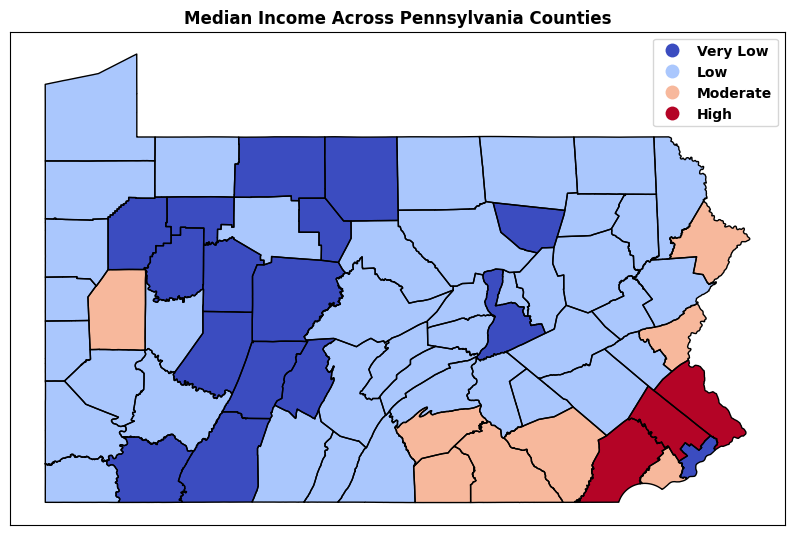

In [12]:
#Mapping Income Levels across PA
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
joined.geometry.boundary.plot(ax=ax, edgecolor='k',linewidth = 1)
joined.plot(column='Median Income Group', cmap='coolwarm',
          ax=ax, categorical=True,
          legend=True, legend_kwds={'loc': 'upper right','fmt': "{:.0f}", 'fontsize': 'medium'})
plt.title('Median Income Across Pennsylvania Counties')
ax.set_xticks([])
ax.set_yticks([])
plt.show();

### Income by County
After binning the median incomes across counties, it is apparent that the counties in and around Philadelphia are the highest earners. West of Philadelphia, only Butler county has a median household income above $65,000.

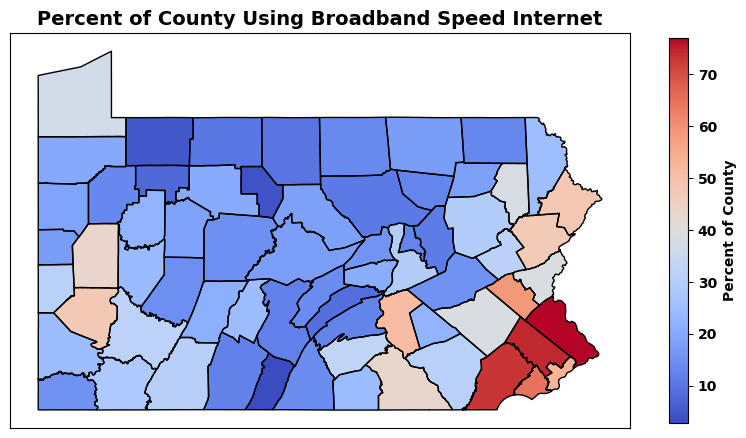

In [13]:
#Mapping Broadband across PA
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
joined.geometry.boundary.plot(ax=ax, edgecolor='k',linewidth = 1)
joined.plot(column='BROADBAND USAGE', cmap='coolwarm',
          ax=ax, categorical=False,
          legend=True, legend_kwds={'fmt': "{:.0f}", 
                                    "label": "Percent of County", 
                                    "orientation": "vertical",
                                   'shrink': .5})
plt.title('Percent of County Using Broadband Speed Internet', size = 14)
ax.set_xticks([])
ax.set_yticks([])
plt.show();

### Broadband Speed Internet Usage In Pennsylvania
Broadband speed internet is defined as 25 megabits per second download and 3 megabits per second upload (FCC, 2015). This map shows the median percentage, by zip code, of each county using broadband speed. 
Around Philadelphia, Pittsburgh, and toward New York are the only areas where the majority of residents are using broadband speeds or better. Most of the state is not using internet that meets the FCC's minimum standard.

### Broadband and Income Correlation
What is the relationship between internet access and household income in a county?

In [14]:
intInc = joined[['BROADBAND USAGE','Median Income', 
                 '%belbas22', '%bas22', '%prof22', '%adv22', 
                 '%belbas18', '%bas18', '%prof18', '%adv18',
                '5 to 9 year olds enrolled in school', '10 to 14 year olds enrolled in school']]
intIncCorr = intInc.corr()

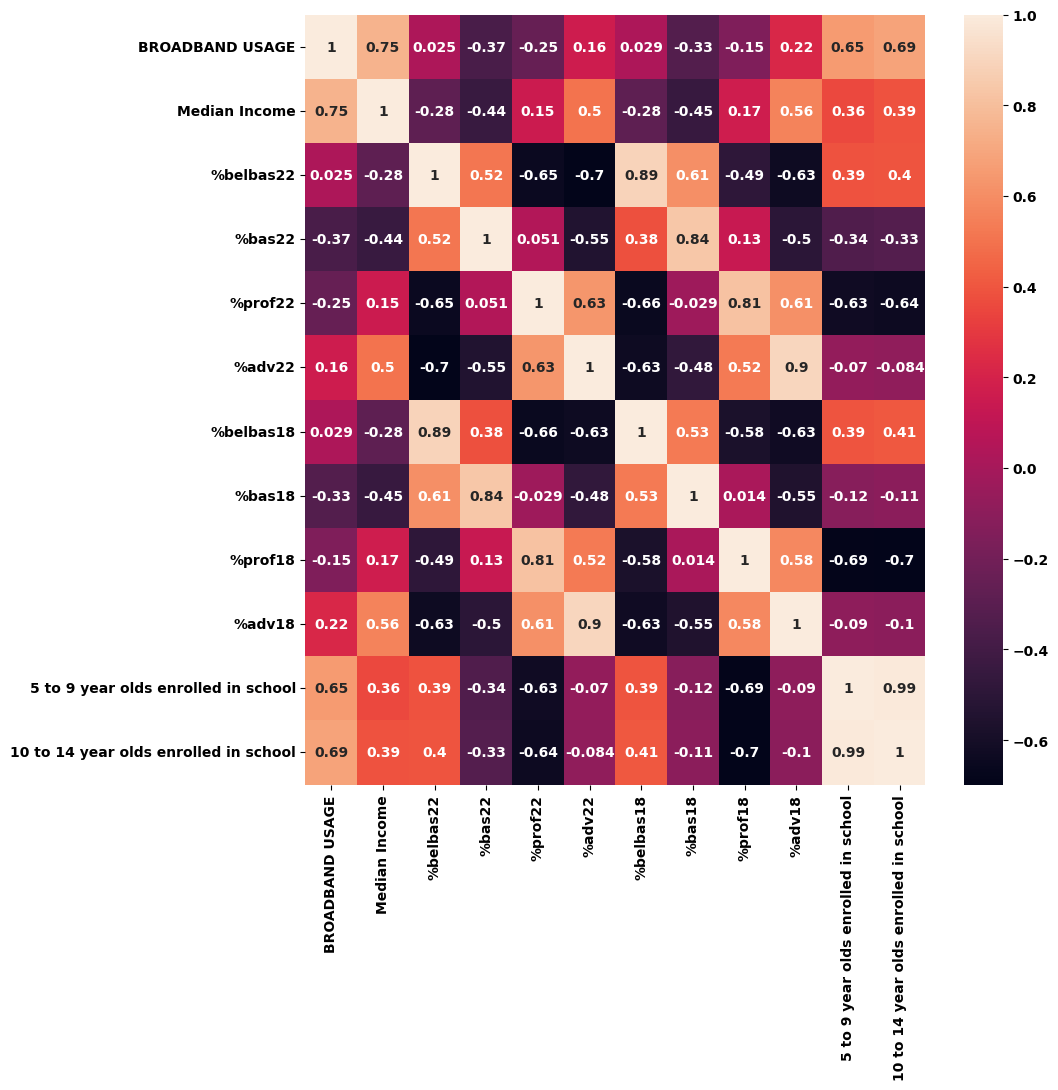

In [15]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(intIncCorr, annot = True)
plt.show()

The median county broadband usage rate is highly correlated with the median income in the county. Higher income counties have higher broadband usage rates and lower income counties use lower speed internet. 

### Educational Pandemic Outcomes in High and Low Broadband Usage Counties
What happened to educational outcomes for areas with low broadband usage versus strong internet access?

In [16]:
highspeed = joined[joined['BROADBAND USAGE'] >= 60].copy()
highspeed['Below Basic Change'] = highspeed['%belbas22'] - highspeed['%belbas18']
lowspeed = joined[joined['BROADBAND USAGE'] <= 20].copy()
lowspeed['Below Basic Change'] = lowspeed['%belbas22'] - lowspeed['%belbas18']
print('Highspeed (>60%) County Increase in % Below Basic:', highspeed['Below Basic Change'].mean(), '\n---\n', 
      'Lowspeed (<20%) County Increase in % Below Basic:', lowspeed['Below Basic Change'].mean())

Highspeed (>60%) County Increase in % Below Basic: 4.8375 
---
 Lowspeed (<20%) County Increase in % Below Basic: 6.0435483870967746


On average, the share of sutdents that scored below basic levels increased in high and low broadband usage counties. It increased more (6% vs. 4.8%) in low broadband usage counties.

## Changes Across Groups
### What happended across broadband usage levels and median county incomes?

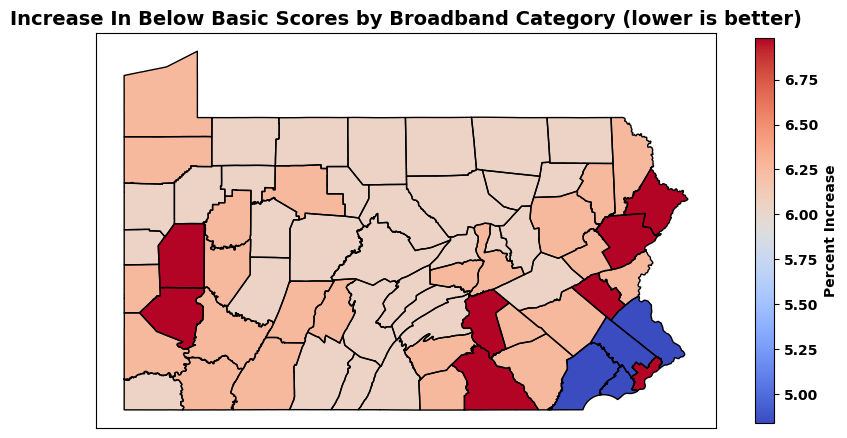

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
joined.geometry.boundary.plot(ax=ax, edgecolor='k',linewidth = 1)
joined.plot(column='Below Basic Change Broadband Category', cmap='coolwarm',
          ax=ax, categorical=False,
          legend=True, legend_kwds={'fmt': "{:.0f}", 
                                    "label": "Percent Increase", 
                                    "orientation": "vertical",
                                   'shrink': .5})
plt.title('Increase In Below Basic Scores by Broadband Category (lower is better)', size = 14)
ax.set_xticks([])
ax.set_yticks([])
plt.show();

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=joined["County"],
    y=joined["Below Basic Change"],
    name='Below Basic Change',
    marker_color='steelblue'
))

"""fig.add_trace(go.Bar(
    x=joined["County"],
    y=joined["Basic Change"],
    name='Basic Change',
    marker_color='tomato'
))"""

fig.update_layout(
    title_text='Test Level Change 2018 to 2022',
    barmode='group',
    xaxis=dict(
        tickmode='array',
        tickvals=joined["County"],
        ticktext=joined['County'],
        tickangle=-45
    )
)
fig.show()


In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=joined["County"],
    y=joined["Proficient Change"],
    name='Prof Change',
    marker_color='aqua'
))

fig.add_trace(go.Bar(
    x=joined["County"],
    y=joined["Advanced Change"],
    name='Adv Change',
    marker_color='indigo'
))
fig.update_layout(
    title_text='Test Level Change 2018 to 2022',
    barmode='group',
    xaxis=dict(
        tickmode='array',
        tickvals=joined["County"],
        ticktext=joined['County'],
        tickangle=-45
    )
)
fig.show()

In [20]:
fig = px.scatter(joined, x=['%belbas22','%belbas18'], y='County', labels={'variable':'Year'})
fig.update_layout(title_text = "",
    xaxis_title = "",
    margin_l = 65)
for i in range(joined.shape[0]):
    fig.add_shape(
        type='line',
        x0=joined['%belbas22'].iloc[i], y0=joined['County'].iloc[i], 
        x1=joined['%belbas18'].iloc[i], y1=joined['County'].iloc[i],
        line_color="#cccccc"
    )
fig.show()

In [21]:
fig = go.Figure()
for incgroup, group in joined.groupby('Median Income Group'):
    fig.add_trace(go.Scatter(x=group['County'], 
                         y=group['Below Basic Change'], 
                         name = incgroup))
   

fig.show()

C:\Users\Garet\AppData\Local\Temp\ipykernel_31824\2874263611.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [22]:
fig = plt.figure(figsize = (20,20))
fig = px.scatter(joined, x ='Below Basic Change', y = 'Basic Change', 
                 facet_col = 'Median Income Group', facet_row = 'Broadband Speed Category')
fig.show()

C:\Users\Garet\anaconda3\envs\EDA\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 2000x2000 with 0 Axes>

# Broadband

## Broadband and Education 2018

In [23]:
dataSpeed.head()
dataSpeed18 = pd.melt(dataSpeed, id_vars = ['Broadband Speed Category'],
                       value_vars = ['%adv18', '%prof18', '%bas18', '%belbas18'])
dataSpeed18.rename({'variable': 'Level 2018', 'value': 'Score 2018'}, axis = 1, inplace = True)
dataSpeed22 = pd.melt(dataSpeed, id_vars = ['Broadband Speed Category'],
                       value_vars = ['%adv22', '%prof22', '%bas22', '%belbas22'])
dataSpeed22.rename({'variable': 'Level 2022', 'value': 'Score 2022'}, axis = 1, inplace = True)
dataSpeedMelt = pd.merge(dataSpeed18, dataSpeed22, on = 'Broadband Speed Category')
dataSpeedMelt2 = pd.melt(dataSpeed, id_vars = ['Broadband Speed Category'],
                       value_vars = ['%adv18', '%prof18', '%bas18', '%belbas18',
                                     '%adv22', '%prof22', '%bas22', '%belbas22'])
dataSpeed

,Broadband Speed Category,number18,%adv18,%prof18,%bas18,%belbas18,number22,%adv22,%prof22,%bas22,...,Median Income,Population,Below Basic Change,Basic Change,Proficient Change,Advanced Change,Below Basic Change Broadband Category,Basic Change Broadband Category,Proficient Change Broadband Category,Advanced Change Broadband Category
0,Very Low,67.274194,16.445161,36.761290,27.975806,10.541935,67.693548,13.2500,33.972581,30.312903,...,52103.677419,15405.375000,6.043548,2.337097,-2.788710,-3.195161,6.043548,2.337097,-2.788710,-3.195161
1,Low,79.958333,17.150000,36.960417,27.231250,10.435417,76.645833,14.0250,33.400000,29.372917,...,56399.958333,29678.150000,6.260417,2.141667,-3.560417,-3.125000,6.260417,2.141667,-3.560417,-3.125000
2,Moderate,89.625000,15.331250,34.337500,27.000000,12.925000,86.687500,12.1250,30.281250,28.956250,...,62321.125000,87232.857143,6.981250,1.956250,-4.056250,-3.206250,6.981250,1.956250,-4.056250,-3.206250
3,High,86.750000,24.650000,36.112500,22.150000,7.237500,82.250000,19.8375,33.625000,25.412500,...,88844.000000,101314.000000,4.837500,3.262500,-2.487500,-4.812500,4.837500,3.262500,-2.487500,-4.812500


In [24]:
fig = px.histogram(dataSpeed18, x = 'Level 2018', y = 'Score 2018', color = 'Broadband Speed Category', 
                   barmode = 'group',
                  color_discrete_sequence=['#A6C9BA','#FDCDAC', '#CBD5E8', '#F6AFD3'])

fig.update_layout(
    title= "Pre-Pandemic Average Share of Student Test Score Achievement by Internet Speed",
    title_font_size = 20,
    paper_bgcolor ='white',
    plot_bgcolor = 'white')
        
fig.update_xaxes(
                title = 'Test Score Achievement Level',
                tickmode='array',
                tickangle=-10,
                tickvals = ['%belbas18', '%bas18', '%prof18', '%adv18'],
                ticktext = ['% Below Basic (lower is better)',
                            'Basic (lower is better)',
                            'Proficient (higher is better)',
                            'Advanced (higher is better)'],
                categoryarray=['%belbas18', '%bas18', '%prof18', '%adv18']
                )

fig.update_yaxes(
                title = 'Average Percent at Level'
                )
fig.show()

C:\Users\Garet\anaconda3\envs\EDA\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [25]:
dataSpeed2 = pd.melt(dataSpeed, 
                    id_vars = ['Broadband Speed Category'],
                    value_vars = ['Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change'])
data2 = pd.melt(dataSpeed, 
                    id_vars = ['Broadband Speed Category', 'BROADBAND USAGE'],
                    value_vars = ['Below Basic Change Broadband Category', 'Basic Change Broadband Category', 
                                  'Proficient Change Broadband Category', 'Advanced Change Broadband Category'])
data2.head()
data2.loc[data2['variable'] == 'Below b']

,Broadband Speed Category,BROADBAND USAGE,variable,value


# Masahiko! Here!

In [26]:

#reformatting test score change
dataSpeed2 = pd.melt(dataSpeed, 
                    id_vars = ['Broadband Speed Category'],
                    value_vars = ['Below Basic Change', 'Basic Change', 'Proficient Change', 'Advanced Change'])
data2 = pd.melt(dataSpeed, 
                    id_vars = ['Broadband Speed Category', 'BROADBAND USAGE'],
                    value_vars = ['Below Basic Change Broadband Category', 'Basic Change Broadband Category', 
                                  'Proficient Change Broadband Category', 'Advanced Change Broadband Category'])
#make chart for below basic change by internet
fig = plt.figure(figsize = (50,50))
fig = px.histogram(data2.loc[data2['variable'] == 'Below Basic Change Broadband Category'], x = 'variable', y = 'value', color = 'Broadband Speed Category', 
                   barmode = 'group',
                  color_discrete_sequence=['#708D80','#FDCDAC', '#CBD5E8', '#F6AFD3'])

fig.update_layout(
    title= "Lowest Learning Loss in Counties with Best Internet Acess",
    title_font_size = 25,
    title_font_color = 'black',
    paper_bgcolor ='white',
    plot_bgcolor = 'white')
        
fig.update_xaxes(title = '',
                tickmode = 'array',
                tickangle = 0,
                linecolor = 'black',
                tickvals = ['Below Basic Change Broadband Category'],
                ticktext = ['Below Basic Level Test Scores']
                )

fig.update_yaxes(
                title = 'Average Percent Increase 2018-22',
                title_font_color = 'black',
                title_font_size = 15,
                linecolor = 'black'
                )
fig.show()

C:\Users\Garet\anaconda3\envs\EDA\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 5000x5000 with 0 Axes>

## Masahiko here too!

In [ ]:
bottom10 = joined.sort_values(by = 'Below Basic Change', ascending = False).head(10)
bottom10['Broadband Speed and Income Category'] = 'Broadband: ' + bottom10['Broadband Speed Category'].astype(str) + '; Income: ' + bottom10['Median Income Group'].astype(str)
bottom10['County Increase'] = bottom10['County'].astype(str) + ' \n' + bottom10['Below Basic Change'].astype(int).astype(str) + '%'
bottom10 = bottom10.sort_values(by = 'Broadband Speed and Income Category', ascending = False)
categories = ['Broadband: Moderate; Income: Very Low', 'Broadband: Moderate; Income: Low', 
              'Broadband: Low; Income: Low', 'Broadband: Low; Income: Very Low',
             'Broadband: Very Low; Income: Low','Broadband: Very Low; Income: Very Low']

fig, ax = plt.subplots(1, 1, figsize=(75, 75))
joined.geometry.boundary.plot(ax=ax, edgecolor='grey', linewidth = 4)
bottom10.plot(column='Broadband Speed and Income Category', cmap = 'Set2',
          ax=ax, categorical=True, categories = categories,
          legend=True, legend_kwds={'loc': 'upper right', 'fontsize': 60, 'markerscale': 4.0})
plt.title('10 Counties with Worst Increase in Share of Below Basic Scores', size = 80)
bottom10.apply(lambda x: ax.annotate(text=x['County Increase'], 
                        xy=x.geometry.centroid.coords[0], ha='center', fontsize = 60), axis=1)
ax.set_xticks([])
ax.set_yticks([])
plt.show();

In [27]:
fig = px.histogram(joined , x = 'Broadband Speed Category', y = 'Below Basic Change', color = 'Broadband Speed Category', 
                   barmode = 'group',
                  color_discrete_sequence=['#708D80','#FDCDAC', '#CBD5E8', '#F6AFD3'])

fig.update_layout(
    title= "Counties with Worse Internet Had Worst Pandemic Learning Loss",
    title_font_size = 20,
    paper_bgcolor ='white',
    plot_bgcolor = 'white')
        
fig.update_xaxes(title = '',
                tickmode = 'array',
                tickangle = 0,
                tickwidth = 0,
                ticktext = ['Below Basic Increase', 'Basic Increase', 
                           'Proficient Decline', 'Advanced Decline'],
                 
                )

fig.update_yaxes(
                title = 'Average Percent Increase'
                )
fig.show()

C:\Users\Garet\anaconda3\envs\EDA\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [28]:
"""fig = px.scatter(data, x="BROADBAND USAGE", y="%belbas18", color = 'Broadband Speed Category',
                 title="Using update_traces() With Plotly Express Figures",
                 trendline = "ols", trendline_scope = 'overall',
                width=700, height=700)
fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.update_layout(
    title= "Test Scores Pre-Pandemic by Internet Speed",
    title_font_size = 20,
    paper_bgcolor ='white',
    plot_bgcolor = 'white',
    xaxis=dict(
        tickmode='array',
        tickangle=-25))

fig.show()"""

'fig = px.scatter(data, x="BROADBAND USAGE", y="%belbas18", color = \'Broadband Speed Category\',\n                 title="Using update_traces() With Plotly Express Figures",\n                 trendline = "ols", trendline_scope = \'overall\',\n                width=700, height=700)\nfig.update_traces(\n    line=dict(dash="dot", width=4),\n    selector=dict(type="scatter", mode="lines"))\n\nfig.update_layout(\n    title= "Test Scores Pre-Pandemic by Internet Speed",\n    title_font_size = 20,\n    paper_bgcolor =\'white\',\n    plot_bgcolor = \'white\',\n    xaxis=dict(\n        tickmode=\'array\',\n        tickangle=-25))\n\nfig.show()'

In [29]:
palette = px.colors.qualitative.Set2
fig = go.Figure()
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['%belbas18'],
    name='Percent Below Basic Level',
    marker_color=palette[0],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['%bas18'],
    name='Percent At Basic Level',
    marker_color=palette[1],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['%prof18'],
    name='Percent At Proficient Level',
    marker_color=palette[2],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['%adv18'],
    name='Percent At Advanced Level',
    marker_color=palette[3],
    mode='markers'
))
fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.update_layout(
    title= "Pre-Pandemic Share of Students at Each Test Score Level Did Not Vary by Internet Speed",
    title_font_size = 18,
    paper_bgcolor ='white',
    plot_bgcolor = 'white',
    xaxis=dict(
        tickmode='array',
        tickangle=-25))

fig.show()

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['Below Basic Change'],
    name='Below Basic Level Change',
    marker_color=palette[0],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['Basic Change'],
    name='Basic Level Change',
    marker_color=palette[1],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['Proficient Change'],
    name='Proficient Level Change',
    marker_color=palette[2],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['Advanced Change'],
    name='Advanced Level Change',
    marker_color=palette[3],
    mode='markers'
))
fig.update_layout(
    title= "Share of Students at Lowest Level Increased More Than Other Levels Across the Pandemic",
    title_font_size = 18,
    paper_bgcolor ='white',
    plot_bgcolor = 'white',
    yaxis = dict(
        title = 'Percent Change'),
    xaxis=dict(
        tickmode='array',
        tickangle=-25,
        title = '% of County Using Broadband Speed'))
fig.update_xaxes(rangeselector_bgcolor='grey',
                zerolinecolor = 'grey')
fig.update_yaxes(zerolinecolor = 'grey')
fig.show()

In [31]:
"""fig = go.Figure()
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['Proficient Change'],
    name='Proficient Level Change',
    marker_color=palette[2],
    mode='markers'
))
fig.add_trace(go.Scatter( 
                         x = data['BROADBAND USAGE'],
                         y = data['Advanced Change'],
    name='Advanced Level Change',
    marker_color=palette[3],
    mode='markers'
))
fig.update_layout(
    title= "Test Score Change Across the Pandemic by Internet Speed",
    title_font_size = 20,
    paper_bgcolor ='white',
    plot_bgcolor = 'white',
    yaxis = dict(
        title = 'Percent Change'),
    xaxis=dict(
        tickmode='array',
        tickangle=-25,
        title = '% of County Using Broadband Speed'))
fig.update_xaxes(rangeselector_bgcolor='grey',
                zerolinecolor = 'grey')
fig.update_yaxes(zerolinecolor = 'grey')
fig.show()"""

'fig = go.Figure()\nfig.add_trace(go.Scatter( \n                         x = data[\'BROADBAND USAGE\'],\n                         y = data[\'Proficient Change\'],\n    name=\'Proficient Level Change\',\n    marker_color=palette[2],\n    mode=\'markers\'\n))\nfig.add_trace(go.Scatter( \n                         x = data[\'BROADBAND USAGE\'],\n                         y = data[\'Advanced Change\'],\n    name=\'Advanced Level Change\',\n    marker_color=palette[3],\n    mode=\'markers\'\n))\nfig.update_layout(\n    title= "Test Score Change Across the Pandemic by Internet Speed",\n    title_font_size = 20,\n    paper_bgcolor =\'white\',\n    plot_bgcolor = \'white\',\n    yaxis = dict(\n        title = \'Percent Change\'),\n    xaxis=dict(\n        tickmode=\'array\',\n        tickangle=-25,\n        title = \'% of County Using Broadband Speed\'))\nfig.update_xaxes(rangeselector_bgcolor=\'grey\',\n                zerolinecolor = \'grey\')\nfig.update_yaxes(zerolinecolor = \'grey\')\nfig.s

## Broadband and Test Score Correlation

In [32]:
BScorr = data[['BROADBAND USAGE', 
               'Below Basic Change', 'Median Income', 'Population']]
BScorr = BScorr.corr()

C:\Users\Garet\AppData\Local\Temp\ipykernel_31824\1661904740.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



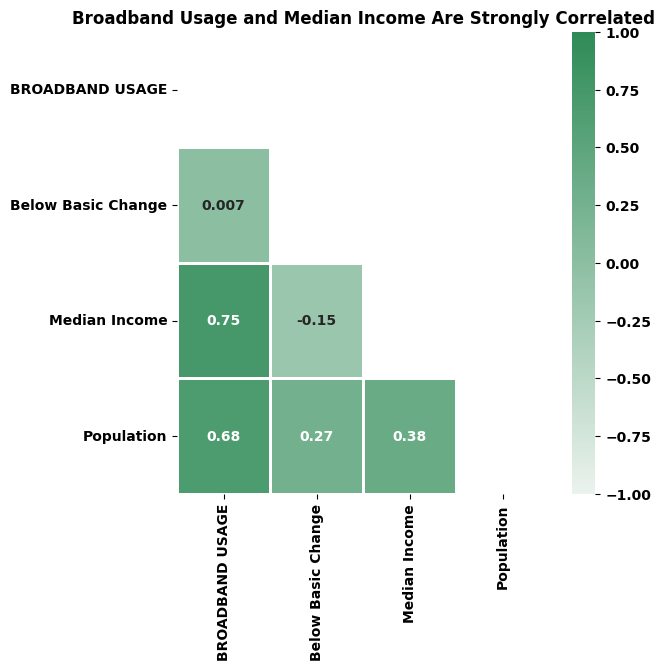

In [33]:
#plotting Broadband correlation with learning loss
fig = plt.figure(figsize = (6,6))
mask = np.triu(np.ones_like(BScorr))

sns.heatmap(BScorr, annot = True, mask=mask, 
            vmin = -1, vmax = 1,
            cmap = sns.light_palette('seagreen', as_cmap = True),
           linewidth = .75)
plt.title('Broadband Usage and Median Income Are Strongly Correlated')

fig.show()

## County Stories

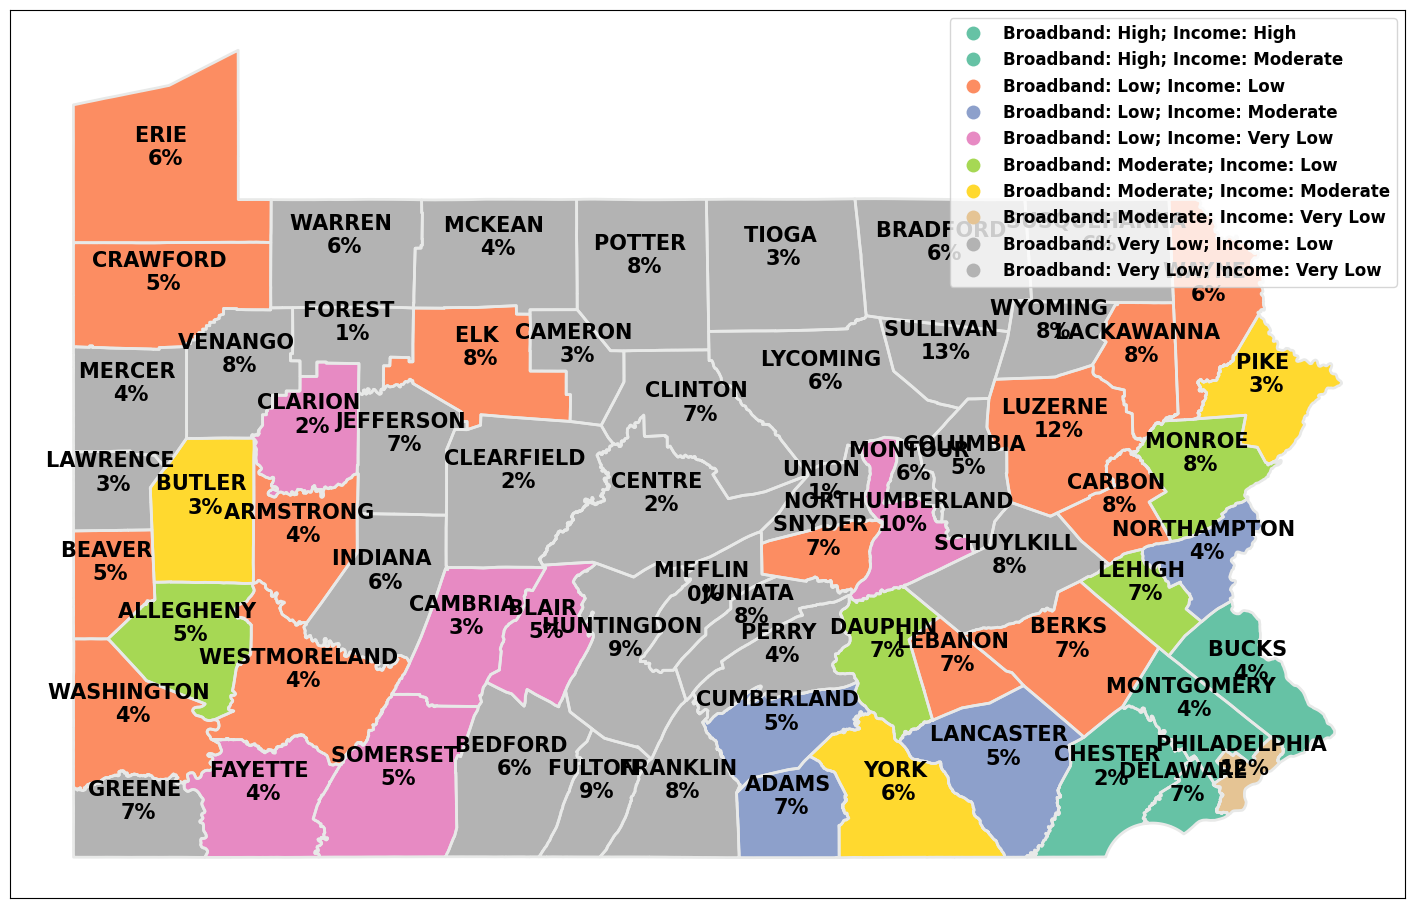

In [146]:
top3 = joined.sort_values(by = 'Below Basic Change', ascending = True)
top3['Broadband Speed and Income Category'] = 'Broadband: ' + top3['Broadband Speed Category'].astype(str) + '; Income: ' + top3['Median Income Group'].astype(str)
top3 = top3.sort_values(by = 'Broadband Speed and Income Category', ascending = False)
top3['County Increase'] = top3['County'].astype(str) + ' \n' + top3['Below Basic Change'].astype(int).astype(str) + '%'

fig, ax = plt.subplots(1, 1, figsize=(18, 18))
joined.geometry.boundary.plot(ax=ax, edgecolor='#E8E9E8',linewidth = 2)
top3.plot(column='Broadband Speed and Income Category', cmap = 'Set2',
          ax=ax, categorical=True,
          legend=True, legend_kwds={'loc': 'upper right', 'fontsize': 'large'})
plt.title('', size = 20)
top3.apply(lambda x: ax.annotate(text=x['County Increase'], 
                        xy=x.geometry.centroid.coords[0], ha='center', fontsize = 15), axis=1)
ax.set_xticks([])
ax.set_yticks([])
plt.show();

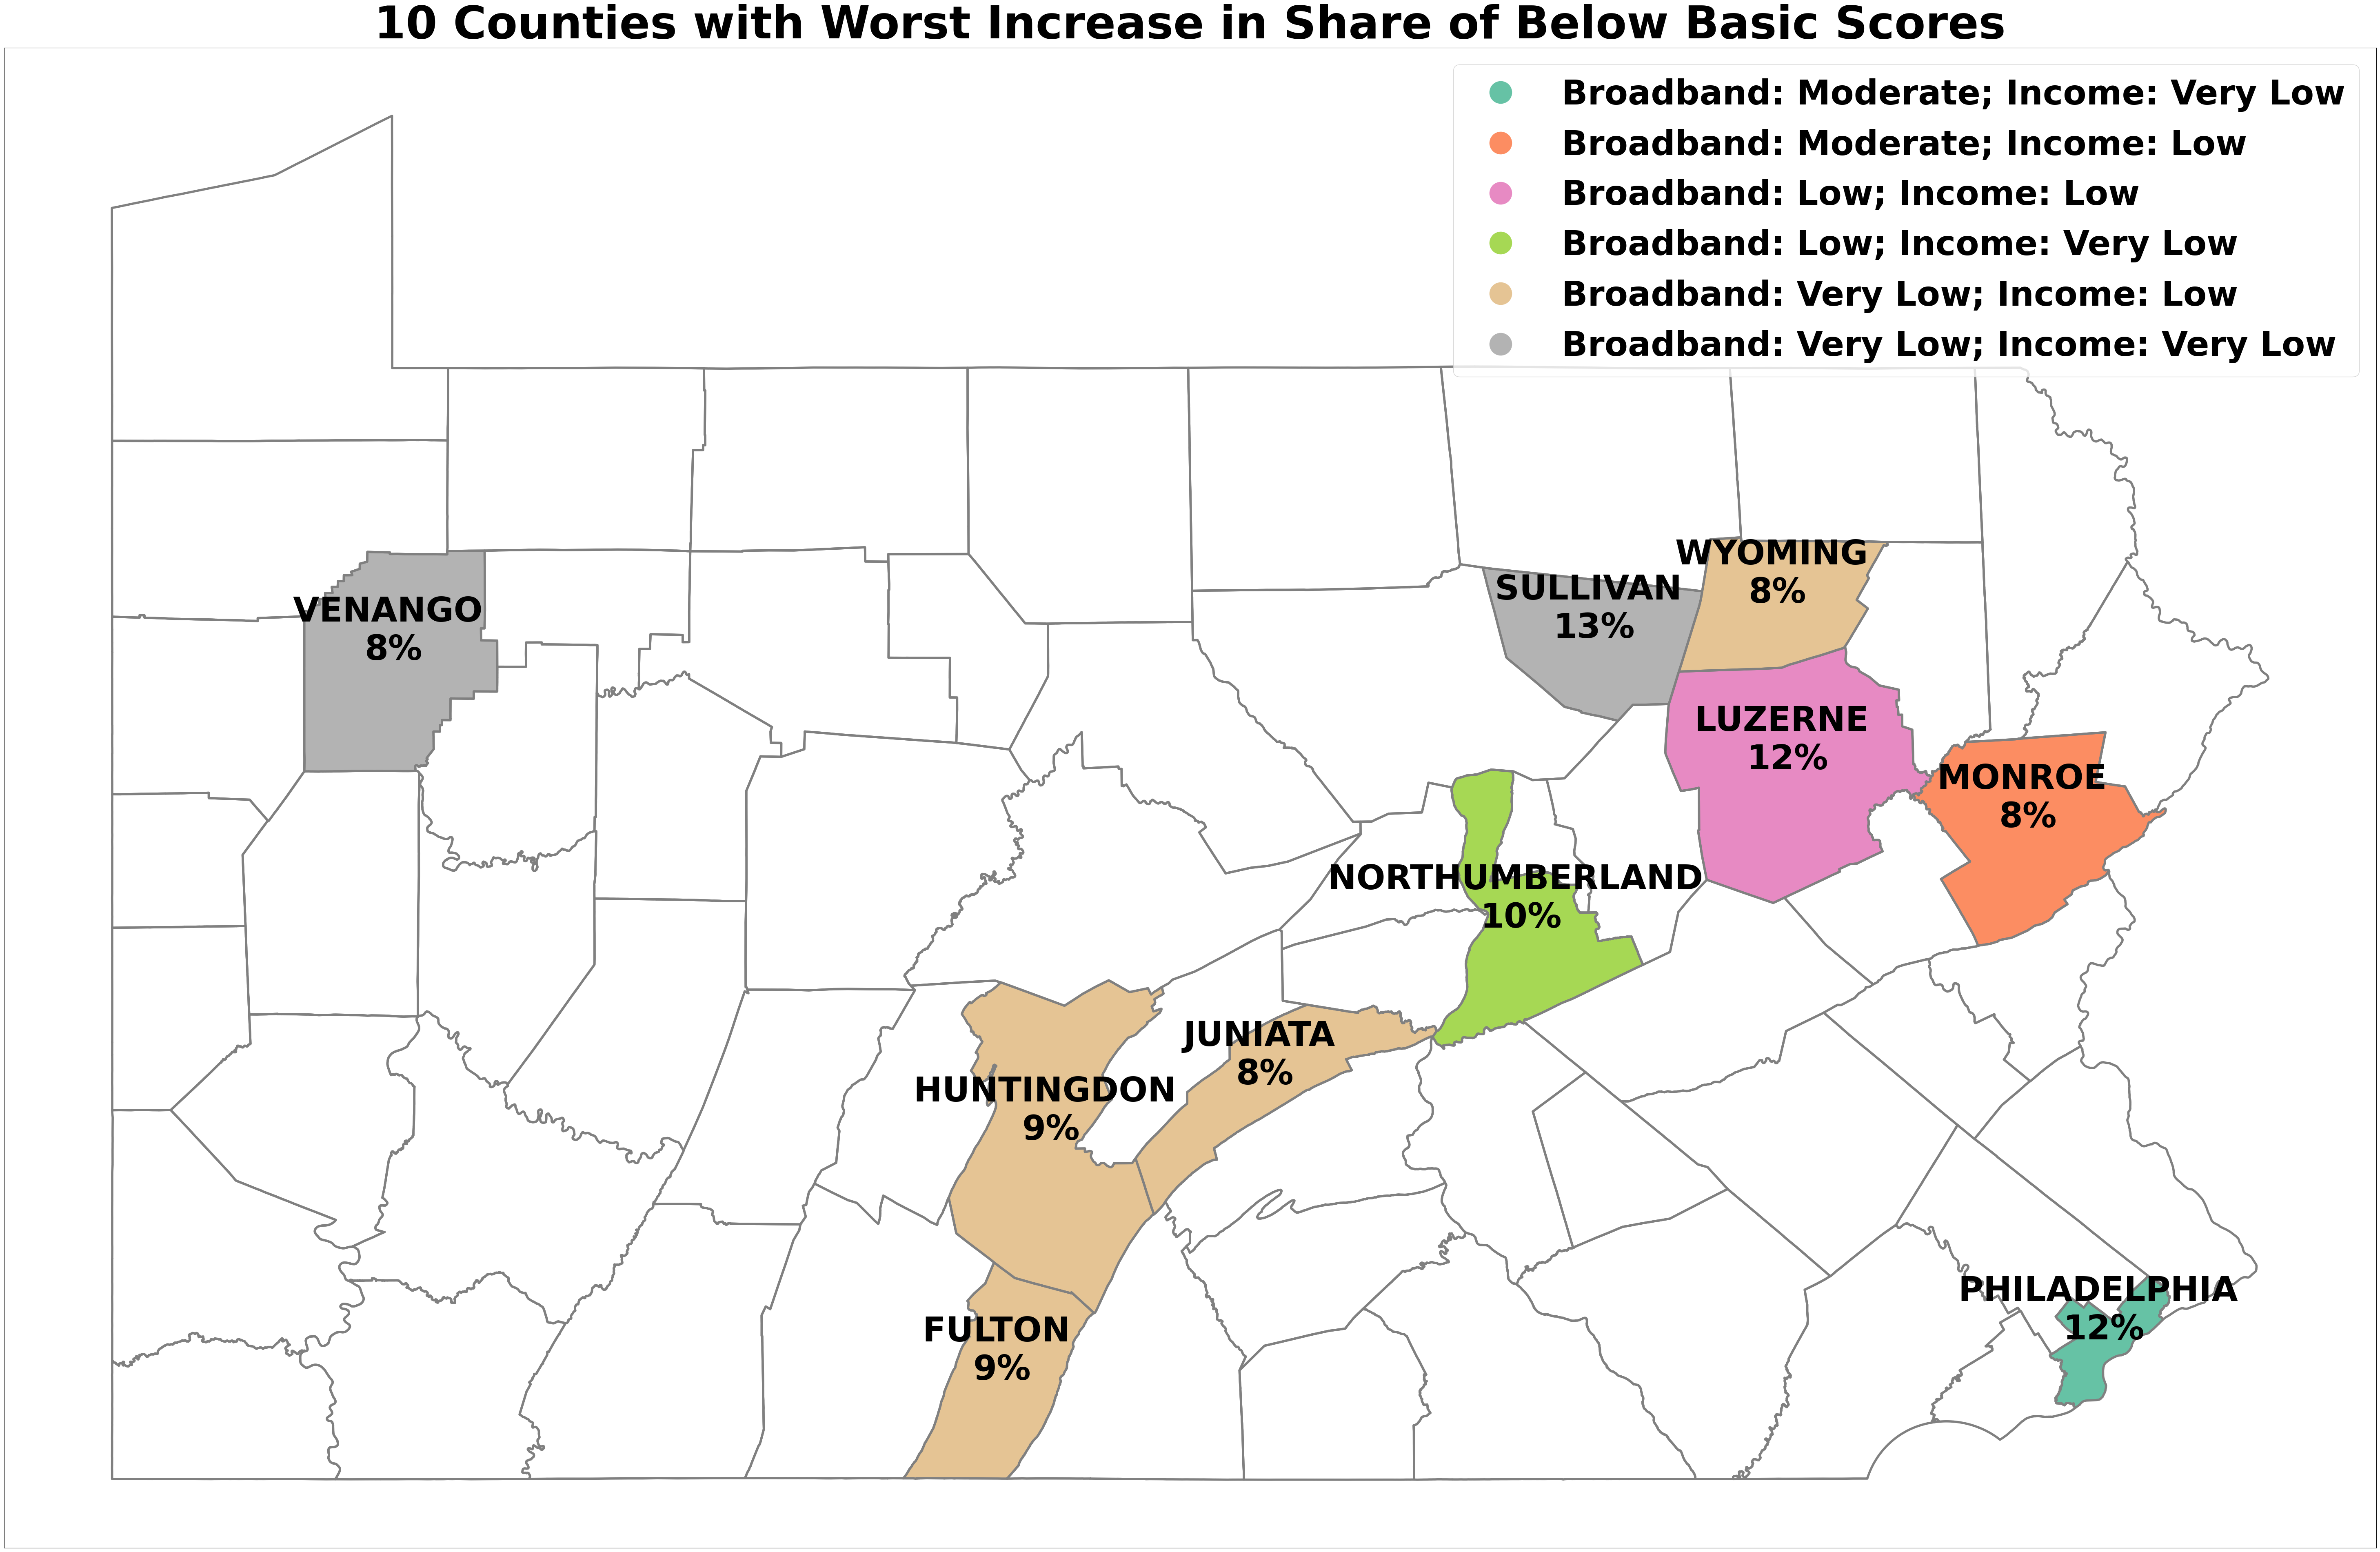

In [167]:
bottom10 = joined.sort_values(by = 'Below Basic Change', ascending = False).head(10)
bottom10['Broadband Speed and Income Category'] = 'Broadband: ' + bottom10['Broadband Speed Category'].astype(str) + '; Income: ' + bottom10['Median Income Group'].astype(str)
bottom10['County Increase'] = bottom10['County'].astype(str) + ' \n' + bottom10['Below Basic Change'].astype(int).astype(str) + '%'
bottom10 = bottom10.sort_values(by = 'Broadband Speed and Income Category', ascending = False)
categories = ['Broadband: Moderate; Income: Very Low', 'Broadband: Moderate; Income: Low', 
              'Broadband: Low; Income: Low', 'Broadband: Low; Income: Very Low',
             'Broadband: Very Low; Income: Low','Broadband: Very Low; Income: Very Low']

fig, ax = plt.subplots(1, 1, figsize=(75, 75))
joined.geometry.boundary.plot(ax=ax, edgecolor='grey', linewidth = 4)
bottom10.plot(column='Broadband Speed and Income Category', cmap = 'Set2',
          ax=ax, categorical=True, categories = categories,
          legend=True, legend_kwds={'loc': 'upper right', 'fontsize': 60, 'markerscale': 4.0})
plt.title('10 Counties with Worst Increase in Share of Below Basic Scores', size = 80)
bottom10.apply(lambda x: ax.annotate(text=x['County Increase'], 
                        xy=x.geometry.centroid.coords[0], ha='center', fontsize = 60), axis=1)
ax.set_xticks([])
ax.set_yticks([])
plt.show();

# References
1. https://www.pasda.psu.edu/download/census/
3. https://geopandas.org/en/stable/docs/user_guide/mapping.html#creating-a-legend
2. Geospatial Lecture
4. Lab 4
5. https://seaborn.pydata.org/tutorial/color_palettes.html
6. https://www.fcc.gov/reports-research/reports/broadband-progress-reports/2015-broadband-progress-report
7. https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy
8. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
9. https://www.geeksforgeeks.org/python-dictionary-comprehension/#
10. https://www.geeksforgeeks.org/select-all-columns-except-one-given-column-in-a-pandas-dataframe/
11. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
12. https://plotly.com/python/bubble-maps/
13. https://plotly.com/python/dumbbell-plots/
33. https://community.plotly.com/t/how-to-make-dumbbell-plots-in-plotly-python/47762/2
14. Preattentive Features Lecture
15. https://stackoverflow.com/questions/68061197/re-order-axis-in-plotly-graph
16. https://plotly.com/python/setting-graph-size/
17. https://plotly.com/python/line-and-scatter/#line-plots-with-plotly-express
18. https://plotly.com/python/discrete-color/#discrete-vs-continuous-color
19. https://plotly.com/python/reference/layout/xaxis/
19. https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/#
20. https://stackoverflow.com/questions/71663911/how-to-add-labels-in-geopandas-geoplot